In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import default_rng

from thztoolsPY.thzgen import thzgen
from thztoolsPY.fftfreq import fftfreq
from thztoolsPY.noiseamp import sigmamu

In [2]:
n = 256     # Number of samples
amp = 1     # Amplitude [units of the peak signal]
ts = 0.05   # Sampling time [ps]
t0 = 2.5    # Peak pulse time [ps]
w = 0.25    # Pulse width [ps]

sigma_alpha = 1e-4  # Additive noise amplitude [signal units]
sigma_beta = 1e-2   # Multiplicative noise amplitude [dimensionless]
sigma_tau = 1e-3    # Time base noise amplitude [ps]
sigma = np.array([sigma_alpha, sigma_beta, sigma_tau])

n_mc = 500  # Number of Monte Carlo repetitions
seed = 0    # RNG seed
rng = default_rng(seed)

In [3]:
y, t = thzgen(n, ts, t0)
noise_amp = sigmamu(sigma, y, ts)

ym = y[:, np.newaxis] + noise_amp[:, np.newaxis] * rng.standard_normal((n, n_mc))

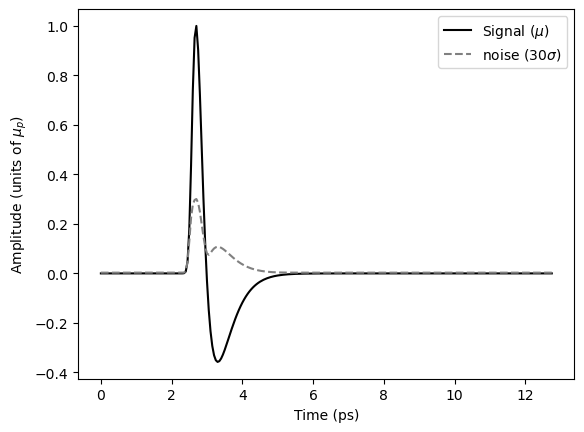

In [4]:
_, ax = plt.subplots()

ax.plot(t, y, c='k', label=r'Signal ($\mu$)')
ax.plot(t, noise_amp * 30, ls='--', c='grey', label=r'noise $(30 \sigma$)')

ax.set_xlabel('Time (ps)')
ax.set_ylabel(r'Amplitude (units of $\mu_{p})$')
ax.legend()

plt.show()

In [5]:
nf = int(n / 2) + 1
f = fftfreq(n, ts)[:nf]
ym_ft = np.fft.fft(ym, axis=0)[:nf, :]
ym_ratio = ym_ft[:, 0::2] / ym_ft[:, 1::2]

vr = np.var(np.real(ym_ratio), axis=1)
vi = np.var(np.imag(ym_ratio), axis=1)
v = vr + vi

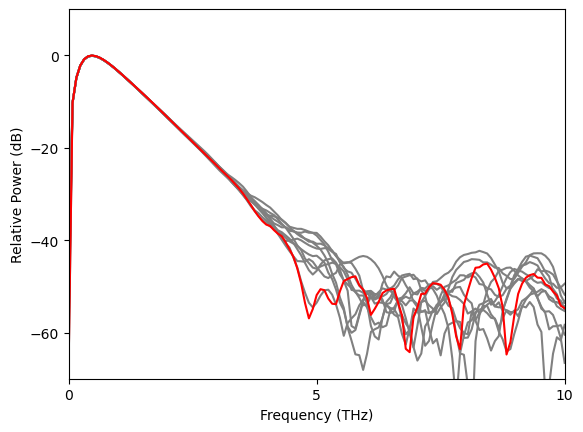

In [6]:
_, ax = plt.subplots()

ax.plot(f, 10 * np.log10(abs(ym_ft[:, 1:11]) ** 2 / max(abs(ym_ft.flatten() ** 2))), c='grey')
ax.plot(f, 10 * np.log10(abs(ym_ft[:, 0]) ** 2 / max(abs(ym_ft.flatten() ** 2))), c='red')

ax.set_xlabel('Frequency (THz)')
ax.set_ylabel('Relative Power (dB)')

ax.set_xticks(np.arange(0, 11, 5))
ax.set_xlim(0, 10)
ax.set_yticks(np.arange(-60, 10, 20))
ax.set_ylim(-70, 10)

plt.show()